In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import  metrics

In [3]:
loan_data=pd.read_csv(r"C:\Users\sjain\Desktop\python\LOAN_APPROVAL_PREDICTOR\notebook\data\Copy of loan - loan.csv")

In [4]:
loan_data.sample(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
141,LP001498,Male,No,0,Graduate,No,5417,0.0,168.0,360.0,1.0,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
504,LP002619,Male,Yes,0,Not Graduate,No,3814,1483.0,124.0,300.0,1.0,Semiurban,Y
77,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# data  has some null values 
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
loan_data=loan_data.dropna()

In [9]:
loan_data.shape

(480, 13)

In [10]:
#LABEL ENCODING
loan_data.replace({'Loan_Status':{'Y':1 , 'N':0}},inplace=True)

In [11]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [12]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [13]:
# 3+ -----> 4
#LABEL ENCODING
loan_data.replace({'Dependents':{'3+':4 }},inplace=True)

In [14]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# DATA VISUALIZATION

<Axes: xlabel='Education', ylabel='count'>

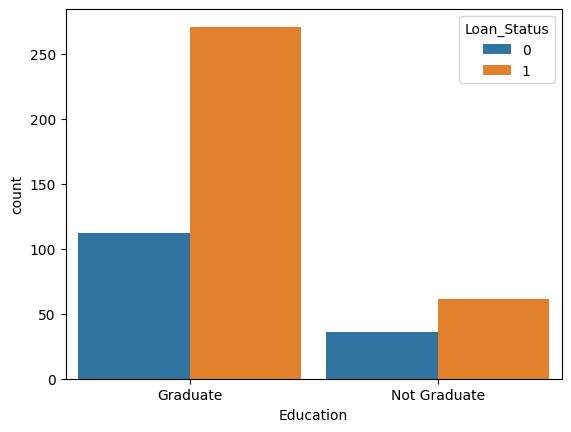

In [15]:
## education and loan ststus check

sns.countplot(x='Education',hue='Loan_Status',data=loan_data,width=0.90)

<Axes: xlabel='Dependents', ylabel='count'>

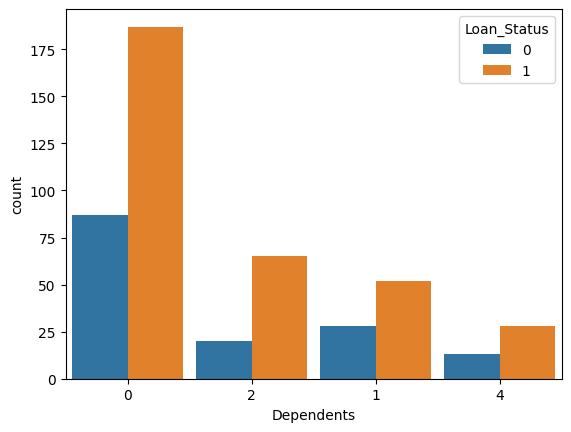

In [16]:
# dependent and loan status

sns.countplot(x='Dependents',hue='Loan_Status',data=loan_data,width=0.90,order=loan_data['Dependents'].value_counts().index)

In [17]:
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [18]:
loan_data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
274,LP001896,1,1,2,1,0,3900,0.0,90.0,360.0,1.0,1,1
150,LP001528,1,0,0,1,0,6277,0.0,118.0,360.0,0.0,0,0
502,LP002615,1,1,2,1,0,4865,5624.0,208.0,360.0,1.0,1,1
300,LP001964,1,1,0,0,0,1800,2934.0,93.0,360.0,0.0,2,0
562,LP002820,1,1,0,1,0,5923,2054.0,211.0,360.0,1.0,0,1
